                            << Digital Image Processing Assignment #02 >> 

ASSIGNMENT AS COMPLEX ENGINEERING PROBLEM

(1)  Spliting the Dataset Automatically

In [1]:
import os
import shutil
import random

# Define paths
SOURCE_DIR = r"C:\Users\HP\Desktop\data"  # Your current dataset location
DEST_DIR = r"C:\Users\HP\Desktop\dataset"  # New dataset with train/test folders
TRAIN_PATH = os.path.join(DEST_DIR, "train")
TEST_PATH = os.path.join(DEST_DIR, "test")
SPLIT_RATIO = 0.7  # 70% for training, 30% for testing

# Ensure train and test directories exist
os.makedirs(TRAIN_PATH, exist_ok=True)
os.makedirs(TEST_PATH, exist_ok=True)

# Loop through each class folder and split images
for class_name in os.listdir(SOURCE_DIR):
    class_path = os.path.join(SOURCE_DIR, class_name)
    if not os.path.isdir(class_path):  # Skip files, process only folders
        continue
    
    images = os.listdir(class_path)
    random.shuffle(images)

    train_size = int(len(images) * SPLIT_RATIO)
    train_images, test_images = images[:train_size], images[train_size:]

    # Create class subfolders in train and test directories
    os.makedirs(os.path.join(TRAIN_PATH, class_name), exist_ok=True)
    os.makedirs(os.path.join(TEST_PATH, class_name), exist_ok=True)

    # Move images
    for img in train_images:
        shutil.move(os.path.join(class_path, img), os.path.join(TRAIN_PATH, class_name, img))
    
    for img in test_images:
        shutil.move(os.path.join(class_path, img), os.path.join(TEST_PATH, class_name, img))

print("✅ Dataset successfully split into train and test folders!")


✅ Dataset successfully split into train and test folders!


In [2]:
%pip install numpy
%pip install tensorflow==2.6.0
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add the DLL directory to the system PATH
os.add_dll_directory(os.path.join(os.environ['SystemRoot'], 'System32'))

# Verify TensorFlow installation
try:
	import tensorflow as tf
	print("TensorFlow version:", tf.__version__)
	from tensorflow.keras.applications import MobileNetV2
	from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
	from tensorflow.keras.models import Model
	from tensorflow.keras.optimizers import Adam
	from sklearn.metrics import classification_report, confusion_matrix
except ImportError as e:
	print("ImportError:", e)
	print("Please ensure you have the Microsoft C++ Redistributable for Visual Studio 2015, 2017 and 2019 installed.")
	print("Download from: https://support.microsoft.com/help/2977003/the-latest-supported-visual-c-downloads")


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.6.0 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.19.0rc0)
ERROR: No matching distribution found for tensorflow==2.6.0
You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\hp\appdata\local\programs\python\python310\lib\site-packages (3.10.1)



You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.
ImportError: Could not find the DLL(s) 'msvcp140.dll or msvcp140_1.dll'. TensorFlow requires that these DLLs be installed in a directory that is named in your %PATH% environment variable. You may install these DLLs by downloading "Microsoft C++ Redistributable for Visual Studio 2015, 2017 and 2019" for your platform from this URL: https://support.microsoft.com/help/2977003/the-latest-supported-visual-c-downloads
Please ensure you have the Microsoft C++ Redistributable for Visual Studio 2015, 2017 and 2019 installed.
Download from: https://support.microsoft.com/help/2977003/the-latest-supported-visual-c-downloads


(2) Image Classification Model 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\HP\Desktop\dataset\train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\HP\Desktop\dataset\test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("✅ Train and Test Data Loaded Successfully!")


Found 1260 images belonging to 7 classes.
Found 543 images belonging to 7 classes.
✅ Train and Test Data Loaded Successfully!


(3) Build and Train an Image Classification Model

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


(4) Load MobileNetV2 (Feature Extractor)

In [5]:
# Load pre-trained MobileNetV2 without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model (we only train the new classification layers)
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 172,679 (674.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

(5) Train the Model

In [6]:
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS
)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.4039 - loss: 1.7673 - val_accuracy: 0.8564 - val_loss: 0.9261
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8881 - loss: 0.7213 - val_accuracy: 0.9392 - val_loss: 0.3766
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9651 - loss: 0.2820 - val_accuracy: 0.9650 - val_loss: 0.2043
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9875 - loss: 0.1503 - val_accuracy: 0.9779 - val_loss: 0.1413
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9801 - loss: 0.1091 - val_accuracy: 0.9779 - val_loss: 0.1123
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9889 - loss: 0.0745 - val_accuracy: 0.9779 - val_loss: 0.0955
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9922 - loss: 0.0581 - val_accuracy: 0.9797 - val_loss: 0.0865
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9953 - loss: 0.0434 - val_accuracy: 0.9797 - val_loss

(6) Evaluate Model Performance

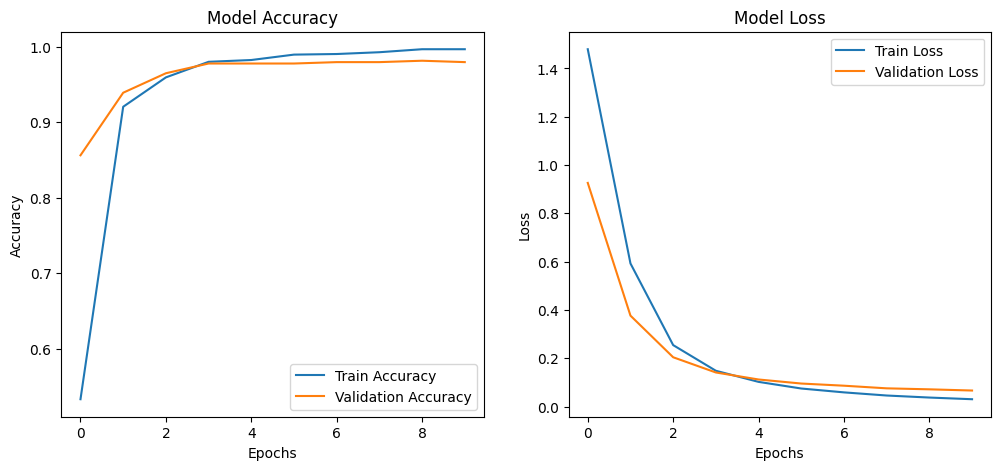

In [7]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


(7) Generate Classification Report & Confusion Matrix

17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step 
              precision    recall  f1-score   support

        bike       0.18      0.18      0.18       110
        cars       0.30      0.30      0.30       126
        cats       0.07      0.07      0.07        61
        dogs       0.13      0.13      0.13        61
     flowers       0.11      0.11      0.11        63
      horses       0.08      0.08      0.08        61
       human       0.08      0.08      0.08        61

    accuracy                           0.16       543
   macro avg       0.14      0.14      0.14       543
weighted avg       0.16      0.16      0.16       543



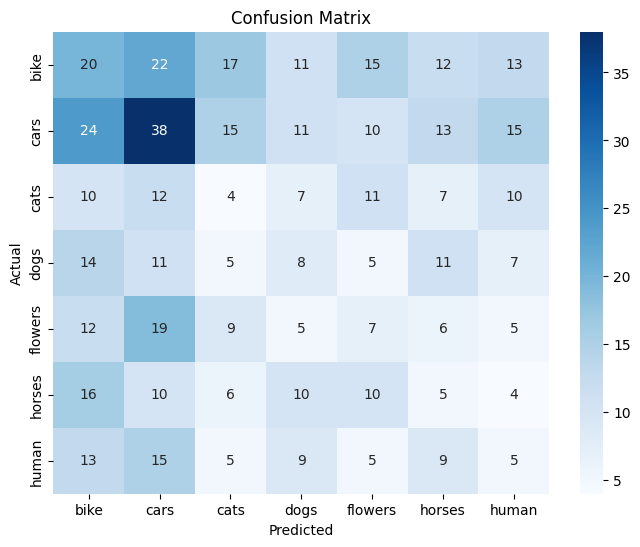

In [8]:
# Get predictions
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


(8) Visualizing Predictions

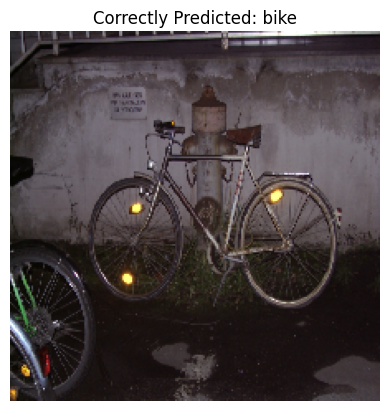

In [10]:
import random

correct_indices = np.where(y_pred == y_true)[0]
correct_sample = random.choice(correct_indices)

# Get the corresponding image and label from the test_generator
batch_index = correct_sample // BATCH_SIZE
image_index = correct_sample % BATCH_SIZE

img, label = test_generator[batch_index][0][image_index], y_true[correct_sample]

plt.imshow(img)
plt.title(f"Correctly Predicted: {class_names[y_pred[correct_sample]]}")
plt.axis('off')
plt.show()


(9) Incorrectly Predicted Samples

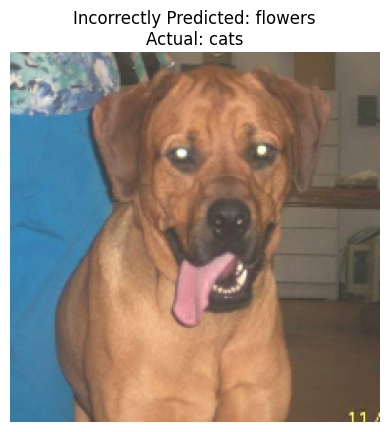

In [12]:
incorrect_indices = np.where(y_pred != y_true)[0]
incorrect_sample = random.choice(incorrect_indices)

# Calculate batch index and image index within the batch
batch_index = incorrect_sample // BATCH_SIZE
image_index = incorrect_sample % BATCH_SIZE

img, label = test_generator[batch_index][0][image_index], y_true[incorrect_sample]

plt.imshow(img)
plt.title(f"Incorrectly Predicted: {class_names[y_pred[incorrect_sample]]}\nActual: {class_names[label]}")
plt.axis('off')
plt.show()


(10) Manual Testing with a New Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


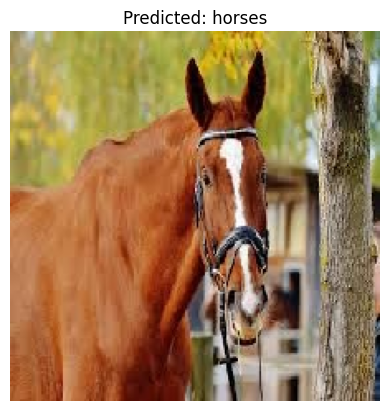

In [13]:
from tensorflow.keras.preprocessing import image

def classify_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred_prob = model.predict(img_array)
    pred_class = class_names[np.argmax(pred_prob)]

    plt.imshow(img)
    plt.title(f"Predicted: {pred_class}")
    plt.axis('off')
    plt.show()

# Example usage
classify_image("C:\\Users\\HP\\Desktop\\horse-43.jpg")


(11) Save and Load Model for Future Use

In [14]:
model.save("image_classifier_model.h5")


( THE END )